## Plotting climate data using pandas

The data for this notebook comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe. 

The data (stored in a [csv]() file) is comprised of daily climate records over the period 2005-2015, from land surface stations near Ann Arbor, Michigan, United States.
Each row in the datafile corresponds to a single observation.

The provided variables are :
- **id** : station identification code
- **date** : date in YYYY-MM-DD format
- **element** : indicator of element type
    - **TMAX** : Maximum temperature (tenths of degrees C)
    - **TMIN** : Minimum temperature (tenths of degrees C)
- **value** : data value for element (in tenths of degrees C)

For the purpose of this notebook, we are going to plot a line chart of the record high and record low temperatures by day of the year over the period 2005-2014. Then, we overlay a scatter of the 2015 data for any points (highs and lows) for which the ten-year record (2005-2014) was broken in 2015.

***

Importing libraries and reading data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

df = pd.read_csv('data.csv')

Since the temparture values are in the tenths of degree Celsius, we need to convert them to °C.

In [2]:
df['Data_Value'] = df['Data_Value']/10 #convert temperatures to °C

Next, we would ensure that the Date values are interpreted as `date type`, and sort the entire DataFrame by date.

In [3]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)  #convert to date type
df = df.sort_values('Date')  #sort DataFrame by date

We use the `head()` function to get the first n rows (5 by default), and the `shape` attribute for a tuple representing the dimensionality of the resulting DataFrame:

In [4]:
print (df.head(), "\n The size of the DataFrame is", df.shape)

                ID       Date Element  Data_Value
60995  USW00004848 2005-01-01    TMIN         0.0
17153  USC00207320 2005-01-01    TMAX        15.0
17155  USC00207320 2005-01-01    TMIN        -1.1
10079  USW00014833 2005-01-01    TMIN        -4.4
10073  USW00014833 2005-01-01    TMAX         3.3 
 The size of the DataFrame is (165085, 4)


For clarity and ease, we are going to create two distinct DataFrames to hold TMAX and TMIN values.

In [5]:
dftmax = df[df['Element']=='TMAX'] #get dataframe of only TMAX values
dftmin = df[df['Element']=='TMIN'] #get dataframe of only TMIN values

To have a better overview of the entire data, I decided to keep all values including those of leap years. In this cell, we use `numpy.arange()` to get all possible dates in such a year (2008).

In [6]:
observation_dates = np.arange('2008-01-01', '2009-01-01', dtype='datetime64[D]')

Now, we would get the maximum temperatures for each day in the period from 2005 to 2014. We should remember that there are several registered values for any given day for that period. The resulting DataFrame **dftmax14** has a length of 3652 (maximum values for each day in a 10-year span).   

Then, we'll create a `pandas series` comprised of all TMAX values in a one-year span (**tmax1y**). For any single day value (1 June for example), we would get the maximum TMAX for that day for the period 2005-2014. 

In [7]:
#extract of TMAX of each day from 2005 to 2014
dftmax14 = dftmax[dftmax['Date']<'2015-01-01'].groupby('Date')['Data_Value'].max()

#set index to month-day format instead of year-m-d
dftmax14.index = dftmax14.index.strftime('%m-%d')

#TMAX in a one year span resume for data from 2005 to 2014
tmax1y = dftmax14.groupby(dftmax14.index).max() 

We repeat the same steps to get minimum temperatures for each day in the period from 2005 to 2014.

In [8]:
#extract of TMIN of each day from 2005 to 2014
dftmin14 = dftmin[dftmin['Date']<'2015-01-01'].groupby('Date')['Data_Value'].min() 

#set index to month-day format instead of year-m-d
dftmin14.index = dftmin14.index.strftime('%m-%d') 

#TMIN in a one year span resume for data from 2005 to 2014
tmin1y = dftmin14.groupby(dftmin14.index).min() 

Similarly, we create a DataFrame for TMAX values in 2015 (**dftmax15**).   
Then, we extract the dates for which TMAX values in 2015 were higher than the values of TMAX over the period 2005-2014 (**observation_dates_tmax15**).   
Finally, we update **dftmax15** to have a DataFrame of those record breaking TMAX values.

In [9]:
#extract of TMAX of each day in 2015
dftmax15 = dftmax[dftmax['Date'] >= '2015-01-01'].groupby('Date')['Data_Value'].max() 
#set index to month-day format instead of year-m-d
dftmax15.index = dftmax15.index.strftime('%m-%d')

dftmax15.loc['02-29'] = tmax1y['02-29']
dftmax15.sort_index(inplace=True)

observation_dates_tmax15 = observation_dates[dftmax15.values > tmax1y.values]

dftmax15 = dftmax15[dftmax15.values > tmax1y.values]

We can check the size of **dftmax15**, and infer that there are 37 days in 2015 that broke all TMAX values registered from 2005 to 2014. 

In [10]:
dftmax15.size

37

The same previous steps to get a DataFrame **dftmin15** of those record breaking TMIN values.

In [11]:
#extract of TMIN of each day in 2015
dftmin15 = dftmin[dftmin['Date'] >= '2015-01-01'].groupby('Date')['Data_Value'].min() 
#set index to month-day format instead of year-m-d
dftmin15.index = dftmin15.index.strftime('%m-%d')

dftmin15.loc['02-29'] = tmin1y['02-29']
dftmin15.sort_index(inplace=True)

observation_dates_tmin15 = observation_dates[dftmin15.values < tmin1y.values]

dftmin15 = dftmin15[dftmin15.values < tmin1y.values]

By checking the size of dftmin15, we infer that there are 32 days in 2015 that broke all TMIN values registered from 2005 to 2014.

In [12]:
dftmin15.size

32

In this cell, we use `matplotlib` and `seaborn ` to create a figure, and plot line charts of the record high and record low temperatures by day of the year over the period 2005-2014, and a scatter of the 2015 data for any points (highs and lows) for which the ten-year record (2005-2014) was broken in 2015.   
I made sure the visual was nice, with appropriate legends and labels, and reduced chart junk. 

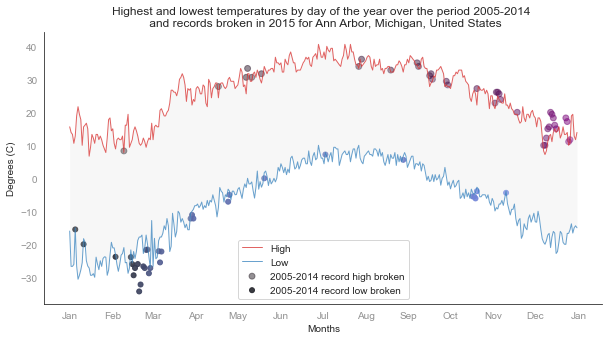

In [17]:
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b")

%matplotlib inline
sns.set_style("white") # Set the aesthetic style of the plot

fig = plt.figure(figsize=(10,5)) # Create a new figure with determined figsize parameter
ax = plt.gca() # Get the current Axes instance on the current figure 

# Plots and Scatter plots of y vs. x with determined parameters
ax.scatter(observation_dates_tmax15 , dftmax15.values, s=35, 
           c=sns.dark_palette("purple", n_colors=37), alpha=0.5, label='2005-2014 record high broken' )
ax.scatter(observation_dates_tmin15 , dftmin15.values, s=25, 
           c=sns.dark_palette((260, 75, 60), input="husl", n_colors=32), alpha=0.9, label='2005-2014 record low broken' )

ax.plot(observation_dates, tmax1y.values, '-', color= sns.color_palette("Reds")[-2], label='High', alpha=0.7, linewidth=1)
ax.plot(observation_dates, tmin1y.values, '-', color= sns.color_palette("Blues")[-2], label='Low', alpha=0.7, linewidth=1)

ax.set_xlabel('Months')
ax.set_ylabel('Degrees (C)')

ax.set_title('Highest and lowest temperatures by day of the year over the period 2005-2014 \n and records broken in 2015 for Ann Arbor, Michigan, United States')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)

plt.xticks(alpha=0.5)
plt.yticks(alpha=0.5)
sns.despine()
ax.legend()

maxv=tmax1y.values
minv=tmin1y.values
#To shade the area between the record high and record low temperatures for each day
ax.fill_between(observation_dates,maxv, minv, facecolor=sns.light_palette("lightgrey")[4], alpha=0.2)

#fig.savefig("temp.png", dpi=200) #comment out to save the figure in png format (reduce dpi to get smaller files)

***   
This is not the only way to represent the data as you may opt to tweak the different parameters, and experience more with the plotting libraries. You can also treat other questions, and have fun with the data and figures.   

Furthermore, there are several ways to handle the data and the various DataFrames. I tried to be more explicit and went for simplicity, all whilst incorporating the [Zen of Python](https://www.python.org/dev/peps/pep-0020/#id2).

If you want to learn more about data science through the python programming language,  I highly recommend [Applied Data Science with Python Specialization](https://www.coursera.org/specializations/data-science-python) on **Coursera**.